In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image


# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


In [2]:
#PATH PROCESS 

In [3]:
No_Data_Path = Path("C:/Users/Sibhat/MRI detection/no")
Yes_Data_Path = Path("C:/Users/Sibhat/MRI detection/yes")

In [4]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [5]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[WindowsPath('C:/Users/Sibhat/MRI detection/no/no0.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no10.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no100.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1000.jpg')]
----------------------------------------------------------------------------------------------------
[WindowsPath('C:/Users/Sibhat/MRI detection/yes/y0.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/yes/y1.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/yes/y10.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/yes/y100.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/yes/y1000.jpg')]


In [6]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [8]:
print(Yes_No_List[0:10])

[WindowsPath('C:/Users/Sibhat/MRI detection/no/no0.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no10.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no100.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1000.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1001.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1002.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1003.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1004.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/no/no1005.jpg')]


In [9]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [15]:
print(JPG_Labels[0:10])


['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [17]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [18]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [19]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [21]:
print(Main_Train_Data.head(-1))


                                              JPG TUMOR_CATEGORY
0        C:\Users\Sibhat\MRI detection\no\no0.jpg             no
1        C:\Users\Sibhat\MRI detection\no\no1.jpg             no
2       C:\Users\Sibhat\MRI detection\no\no10.jpg             no
3      C:\Users\Sibhat\MRI detection\no\no100.jpg             no
4     C:\Users\Sibhat\MRI detection\no\no1000.jpg             no
...                                           ...            ...
2994   C:\Users\Sibhat\MRI detection\yes\y994.jpg            yes
2995   C:\Users\Sibhat\MRI detection\yes\y995.jpg            yes
2996   C:\Users\Sibhat\MRI detection\yes\y996.jpg            yes
2997   C:\Users\Sibhat\MRI detection\yes\y997.jpg            yes
2998   C:\Users\Sibhat\MRI detection\yes\y998.jpg            yes

[2999 rows x 2 columns]


In [18]:
#Test

In [24]:
Prediction_Path = Path("C:/Users/Sibhat/MRI detection/pred")

In [25]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [26]:
print(Test_JPG_Path[0:5])

[WindowsPath('C:/Users/Sibhat/MRI detection/pred/pred0.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/pred/pred1.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/pred/pred10.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/pred/pred11.jpg'), WindowsPath('C:/Users/Sibhat/MRI detection/pred/pred12.jpg')]


In [27]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [33]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred']


In [34]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [35]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [38]:
print(Test_Data.head())

                                             JPG TUMOR_CATEGORY
0   C:\Users\Sibhat\MRI detection\pred\pred0.jpg           pred
1   C:\Users\Sibhat\MRI detection\pred\pred1.jpg           pred
2  C:\Users\Sibhat\MRI detection\pred\pred10.jpg           pred
3  C:\Users\Sibhat\MRI detection\pred\pred11.jpg           pred
4  C:\Users\Sibhat\MRI detection\pred\pred12.jpg           pred


In [39]:
#SHUFFLING


In [42]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

# VISUALIZATION

Text(0.5, 1.0, 'no')

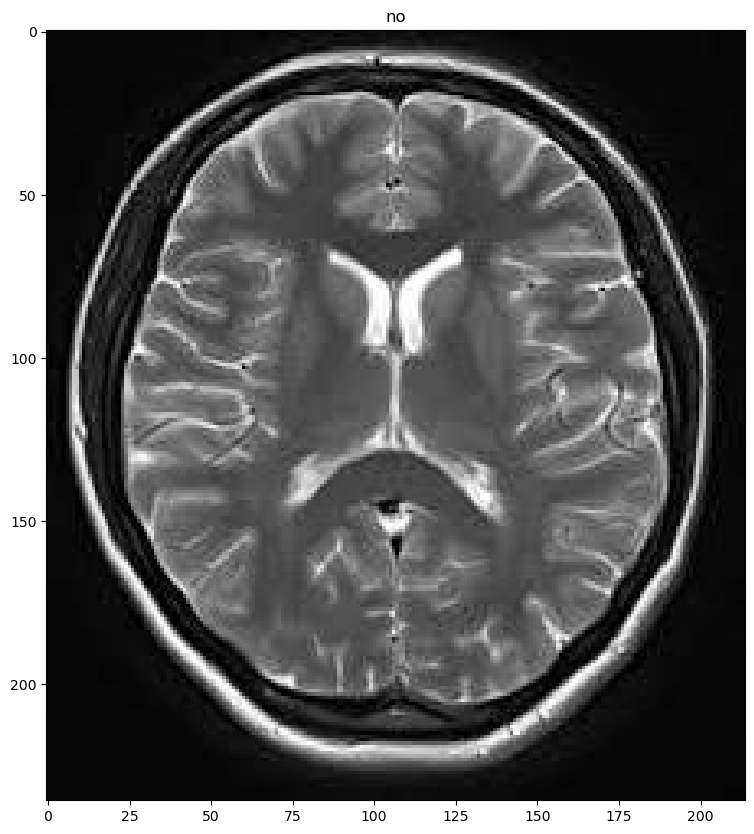

In [47]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

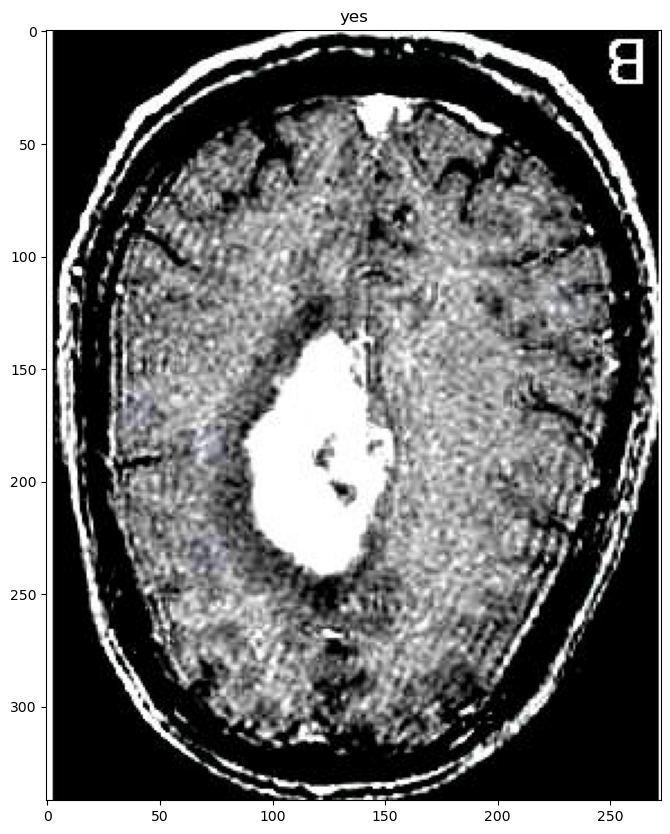

In [48]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

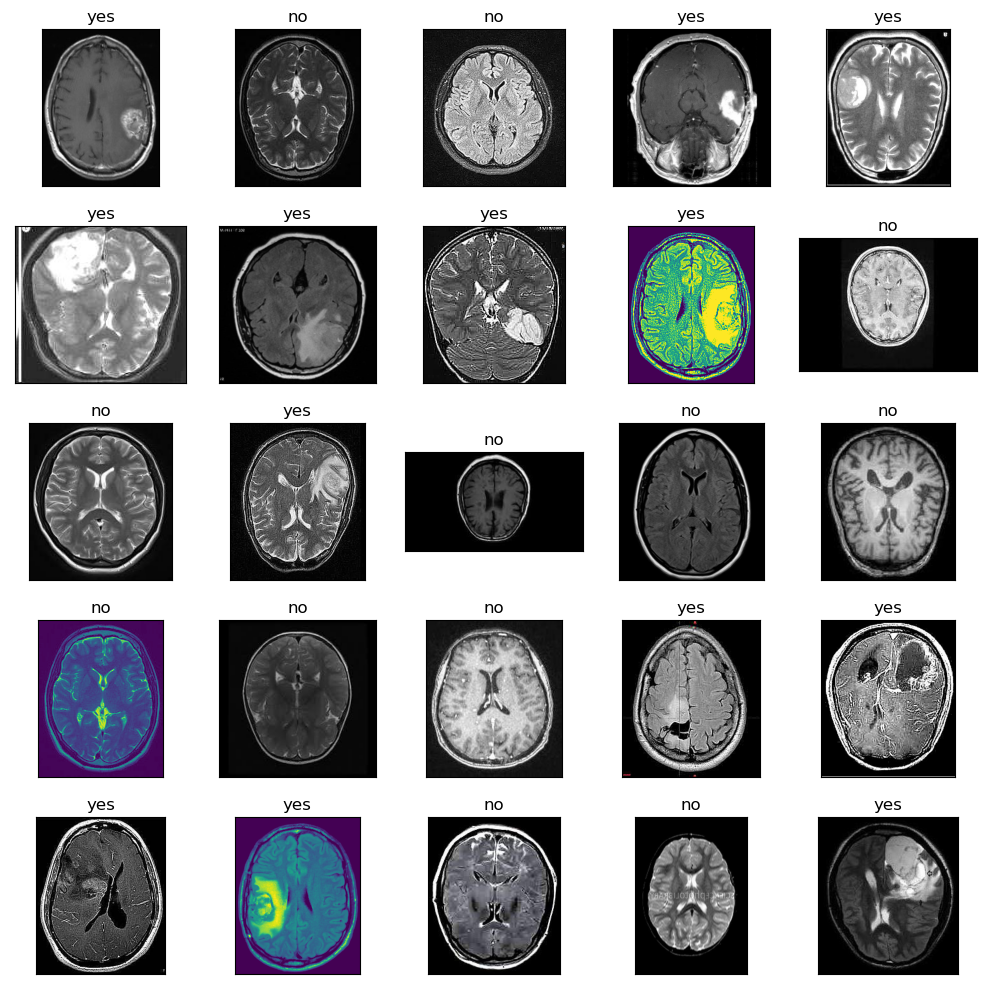

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [51]:
# MODEL TRAINING DATA random_state=42

In [63]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.8, random_state=42)

In [64]:
print(train_data.shape)

(2400, 2)


In [65]:
print(train_data.head())

                                              JPG TUMOR_CATEGORY
642   C:\Users\Sibhat\MRI detection\no\no1356.jpg             no
700    C:\Users\Sibhat\MRI detection\yes\y543.jpg            yes
226   C:\Users\Sibhat\MRI detection\yes\y1037.jpg            yes
1697   C:\Users\Sibhat\MRI detection\no\no873.jpg             no
1010   C:\Users\Sibhat\MRI detection\yes\y920.jpg            yes


In [66]:
print(test_data.shape)

(600, 2)


In [68]:
print(test_data.head())

                                             JPG TUMOR_CATEGORY
1801  C:\Users\Sibhat\MRI detection\no\no211.jpg             no
1190   C:\Users\Sibhat\MRI detection\yes\y84.jpg            yes
1817  C:\Users\Sibhat\MRI detection\no\no330.jpg             no
251   C:\Users\Sibhat\MRI detection\yes\y632.jpg            yes
2505  C:\Users\Sibhat\MRI detection\yes\y971.jpg            yes


In [40]:
#IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

In [69]:
#BASED ON TRAIN DATA

In [70]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)


In [74]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2160 validated image filenames belonging to 2 classes.


In [76]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 240 validated image filenames belonging to 2 classes.


In [78]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 600 validated image filenames belonging to 2 classes.


In [79]:
#CHECKING

In [80]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [48]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [81]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 0, 0, 1]
(200, 200, 1)


In [50]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 0, 1]
(200, 200, 1)


In [82]:
#CNN MODEL FOR NON-DIVERSIFICATION

In [83]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [84]:
#MODEL COMPILE

In [85]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [86]:
#MODEL FITTING

In [56]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 116s 955ms/step - loss: 0.7091 - accuracy: 0.7134 - val_loss: 0.4613 - val_accuracy: 0.8037
Epoch 2/30
120/120 [==============================] - 109s 905ms/step - loss: 0.4033 - accuracy: 0.8385 - val_loss: 0.3216 - val_accuracy: 0.8778
Epoch 3/30
120/120 [==============================] - 114s 953ms/step - loss: 0.2989 - accuracy: 0.8732 - val_loss: 0.3574 - val_accuracy: 0.8630
Epoch 4/30
120/120 [==============================] - 111s 921ms/step - loss: 0.2407 - accuracy: 0.9021 - val_loss: 0.5150 - val_accuracy: 0.8111
Epoch 5/30
120/120 [==============================] - 111s 921ms/step - loss: 0.2010 - accuracy: 0.9234 - val_loss: 0.3499 - val_accuracy: 0.8407
Epoch 6/30
120/120 [==============================] - 125s 1s/step - loss: 0.1771 - accuracy: 0.9351 - val_loss: 0.2315 - val_accuracy: 0.9074
Epoch 7/30
120/120 [==============================] - 137s 1s/step - loss: 0.1413 - accuracy: 0.9463 - val_loss: 0.1871 - val_a

In [53]:
#MODEL SUMMARY

In [58]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 64)       

In [55]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [56]:
Model.compile(optimizer=RMSprop(lr=0.002),loss="categorical_crossentropy",metrics=["accuracy"])

In [57]:
Cnn_model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=50)

Epoch 1/30
50/50 [==============================] - 44s 865ms/step - loss: 1.3211 - accuracy: 0.6180 - val_loss: 0.5870 - val_accuracy: 0.6741
Epoch 2/30
50/50 [==============================] - 43s 858ms/step - loss: 0.5773 - accuracy: 0.7253 - val_loss: 0.5559 - val_accuracy: 0.7333
Epoch 3/30
50/50 [==============================] - 43s 854ms/step - loss: 0.5291 - accuracy: 0.7576 - val_loss: 0.5246 - val_accuracy: 0.7852
Epoch 4/30
50/50 [==============================] - 43s 857ms/step - loss: 0.4816 - accuracy: 0.7990 - val_loss: 0.4389 - val_accuracy: 0.8111
Epoch 5/30
50/50 [==============================] - 42s 849ms/step - loss: 0.4134 - accuracy: 0.8380 - val_loss: 0.3645 - val_accuracy: 0.8296
Epoch 6/30
50/50 [==============================] - 42s 844ms/step - loss: 0.3665 - accuracy: 0.8505 - val_loss: 0.3411 - val_accuracy: 0.8407
Epoch 7/30
50/50 [==============================] - 43s 864ms/step - loss: 0.3474 - accuracy: 0.8510 - val_loss: 0.3076 - val_accuracy: 0.8741

In [ ]:
#CHECKING MODEL WITH GRAPHIC

In [59]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


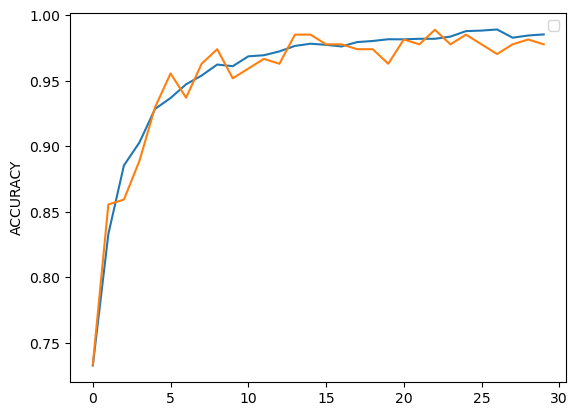

In [60]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

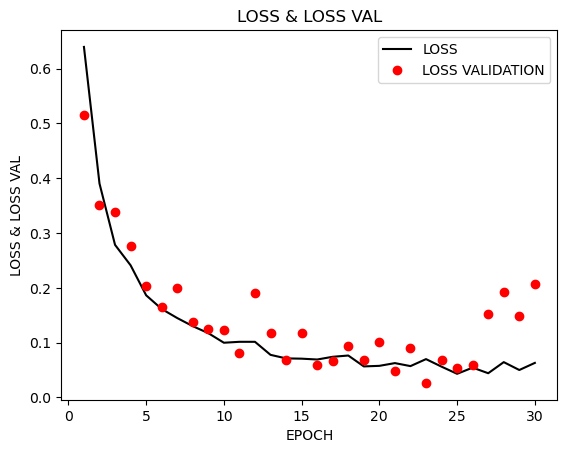

In [61]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

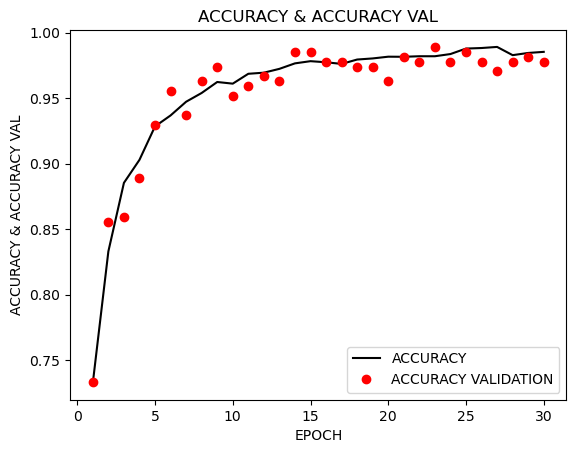

In [62]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

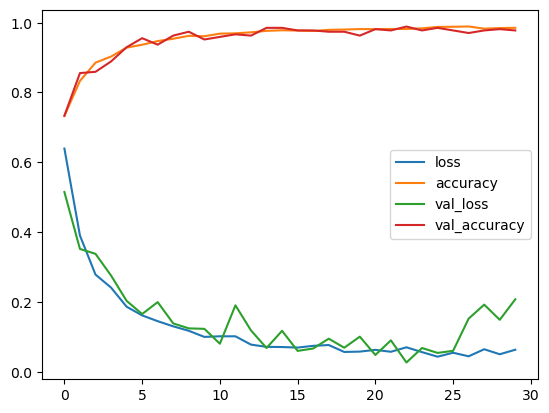

In [63]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [64]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.2564
ACCURACY:  0.94


In [65]:
# PREDICTION PROCESS

In [66]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [67]:
print(Main_Data_Prediction.head())

                                             JPG
0   C:\Users\Sibhat\MRI detection\pred\pred0.jpg
1   C:\Users\Sibhat\MRI detection\pred\pred1.jpg
2  C:\Users\Sibhat\MRI detection\pred\pred10.jpg
3  C:\Users\Sibhat\MRI detection\pred\pred11.jpg
4  C:\Users\Sibhat\MRI detection\pred\pred12.jpg


In [68]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [69]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [70]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 1s 236ms/step


In [71]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [72]:
print(Model_Test_Prediction)

[0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1]


In [73]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO']


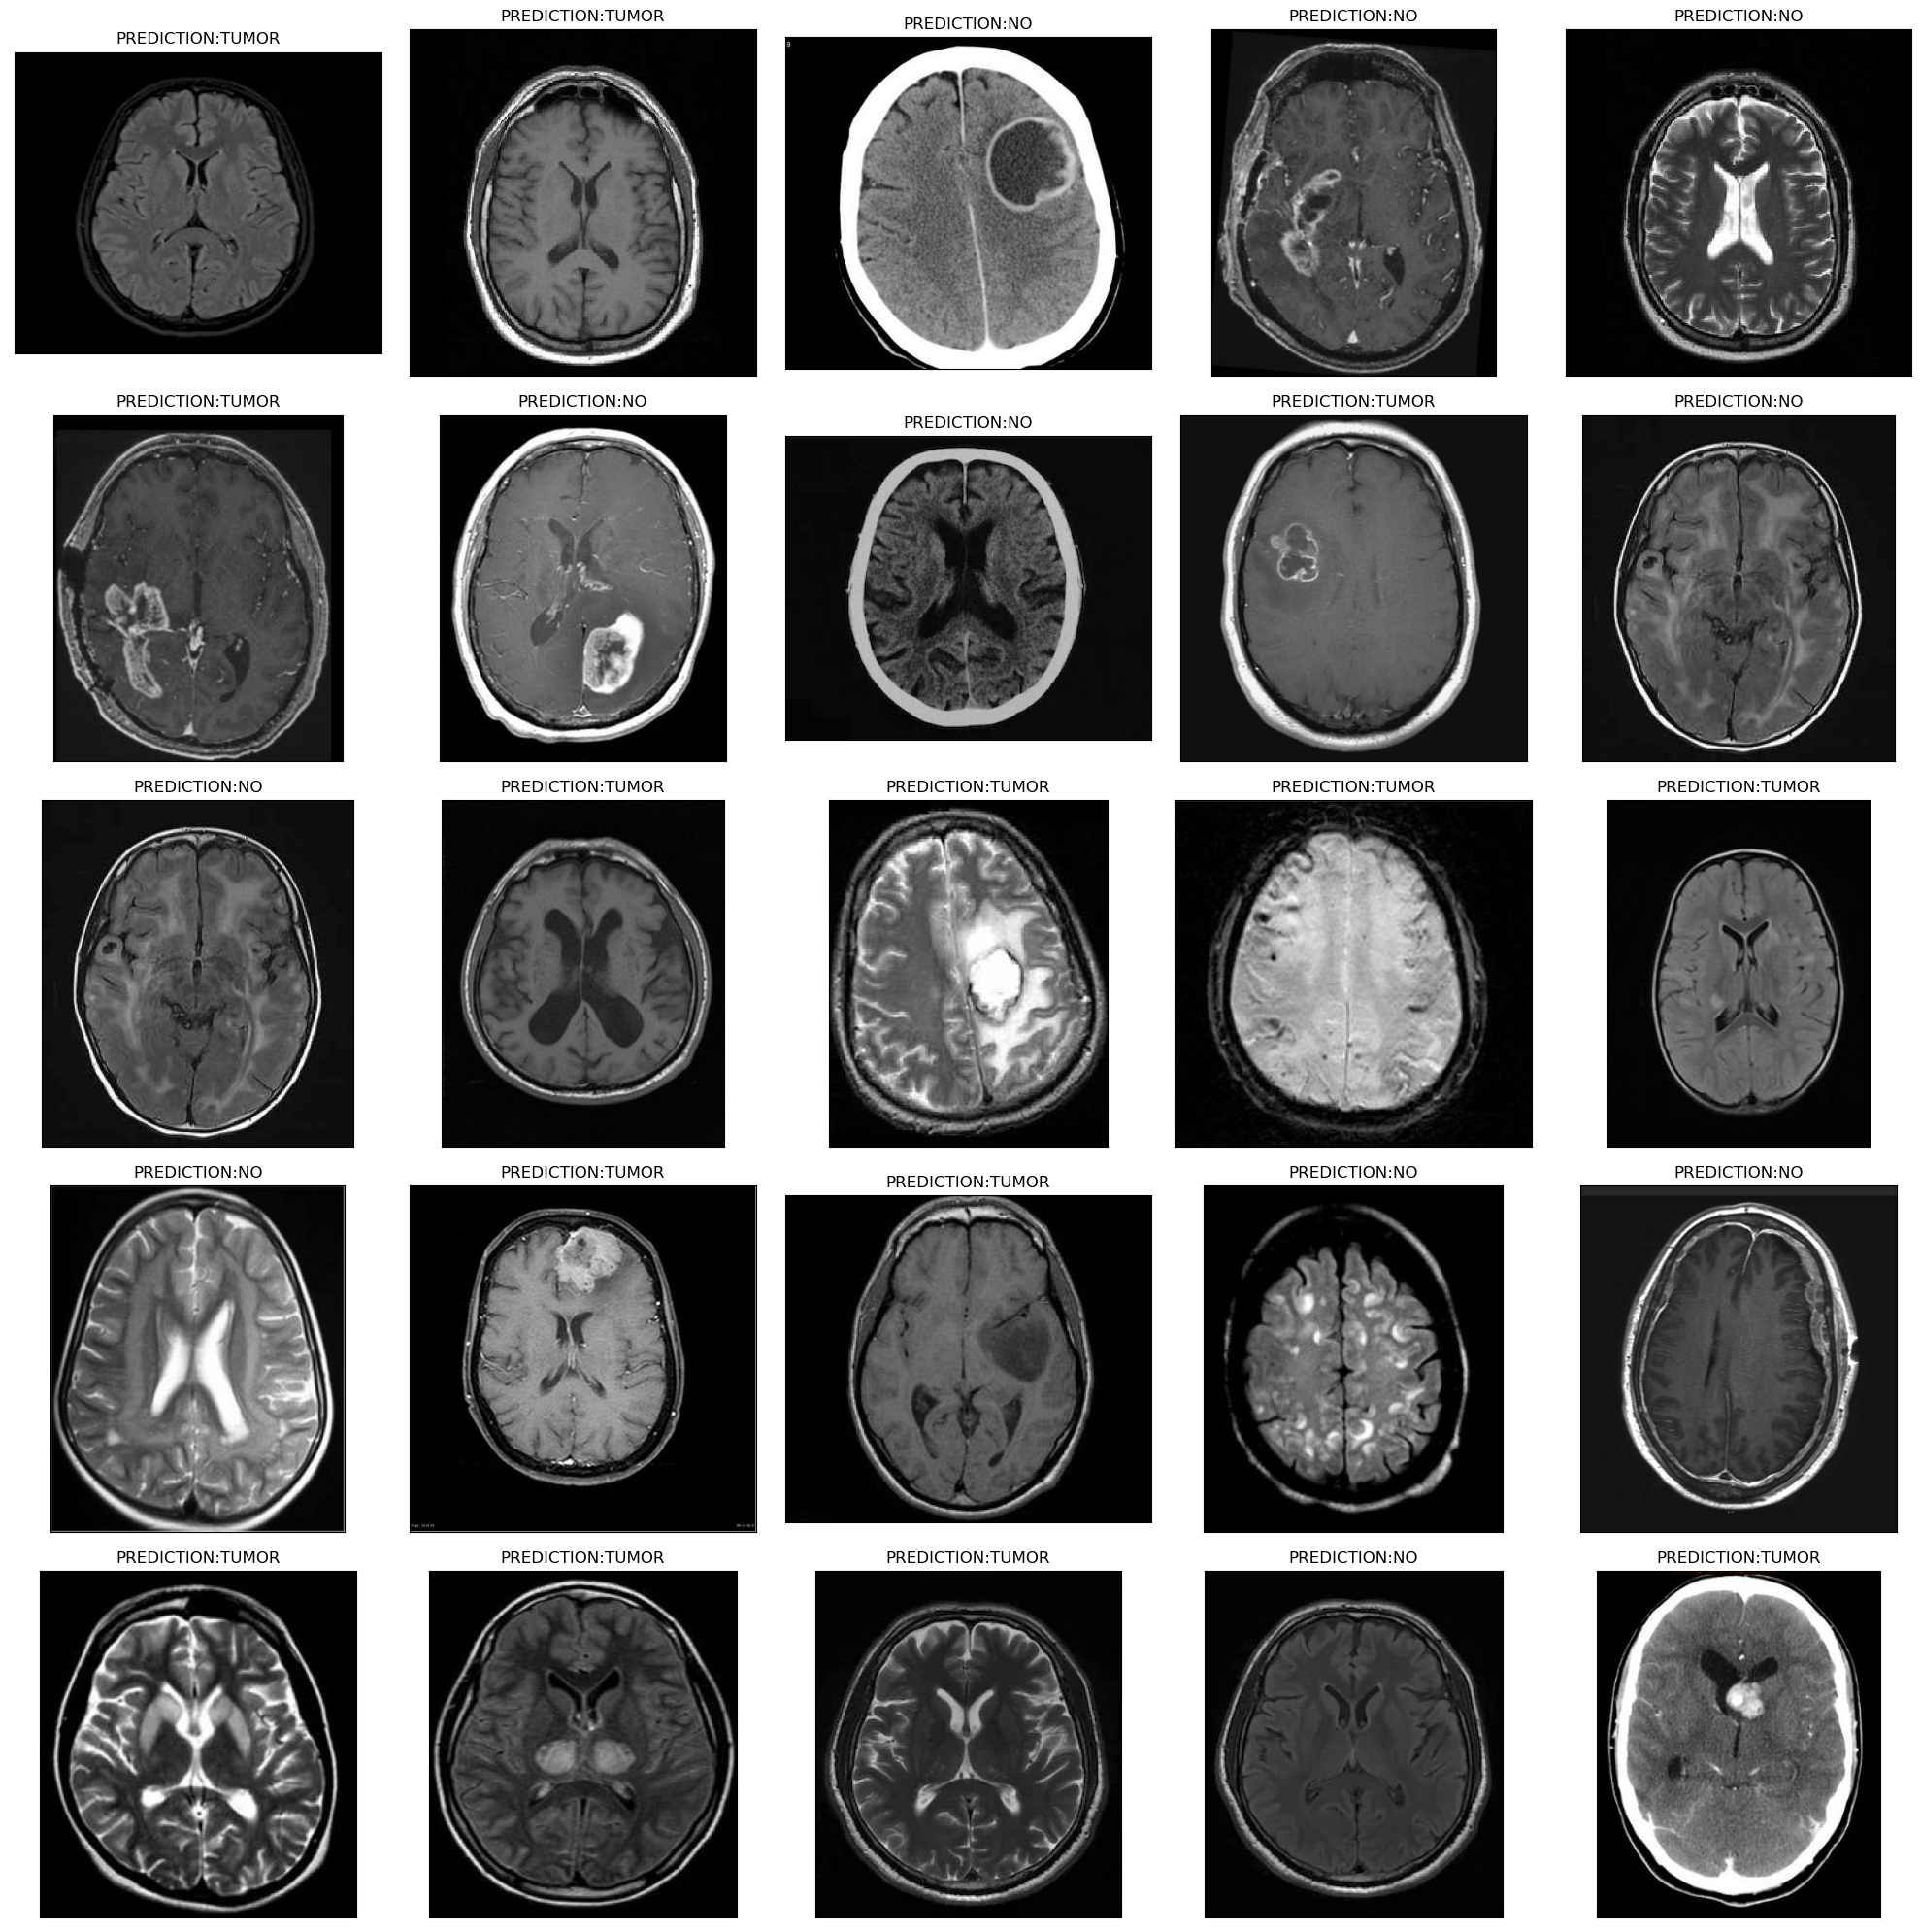

In [74]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [75]:
# IMAGE DATA GENERATOR WITH DIVERSIFICATION

In [76]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [77]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [78]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [79]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [80]:
# CNN MODEL WITH DIVERSIFICATION

In [81]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [82]:
# Model compile


In [83]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [84]:
# MODEL FITTING

In [85]:
CNN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 81s 660ms/step - loss: 0.7009 - accuracy: 0.5819 - val_loss: 0.6776 - val_accuracy: 0.5815
Epoch 2/50
122/122 [==============================] - 80s 653ms/step - loss: 0.6408 - accuracy: 0.6506 - val_loss: 0.6220 - val_accuracy: 0.6481
Epoch 3/50
122/122 [==============================] - 80s 658ms/step - loss: 0.5849 - accuracy: 0.7128 - val_loss: 0.6341 - val_accuracy: 0.7037
Epoch 4/50
122/122 [==============================] - 79s 644ms/step - loss: 0.5648 - accuracy: 0.7284 - val_loss: 0.5739 - val_accuracy: 0.7185
Epoch 5/50
122/122 [==============================] - 79s 651ms/step - loss: 0.5484 - accuracy: 0.7412 - val_loss: 0.4943 - val_accuracy: 0.7556
Epoch 6/50
122/122 [==============================] - 82s 676ms/step - loss: 0.5342 - accuracy: 0.7449 - val_loss: 0.5998 - val_accuracy: 0.7630
Epoch 7/50
122/122 [==============================] - 79s 643ms/step - loss: 0.5270 - accuracy: 0.7564 - val_loss: 0.4920 - val_ac

In [86]:
# MODEL SUMMARY

In [87]:
print(Model_Two.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)     

In [88]:
# CHECKING MODEL WITH GRAPHIC

In [89]:
HistoryDict_Two = CNN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


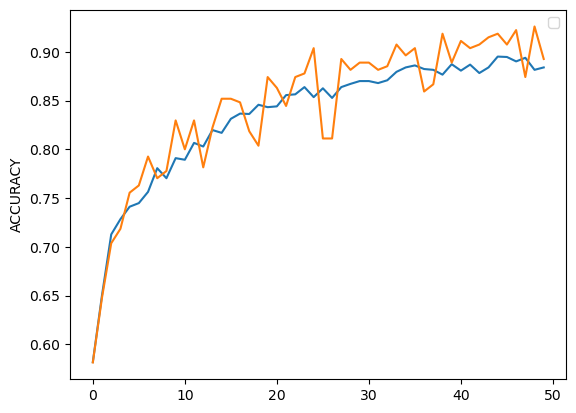

In [90]:
plt.plot(CNN_Model_Two.history["accuracy"])
plt.plot(CNN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

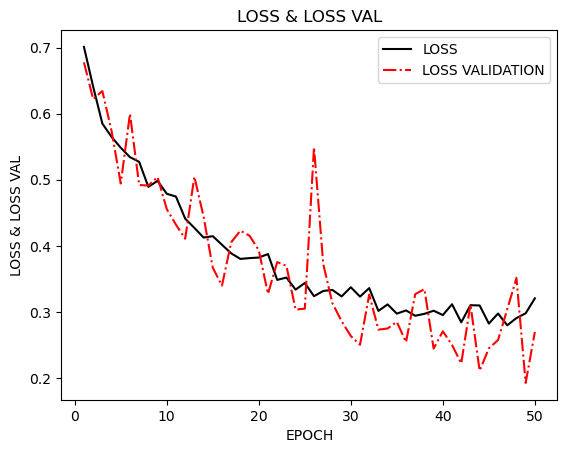

In [91]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

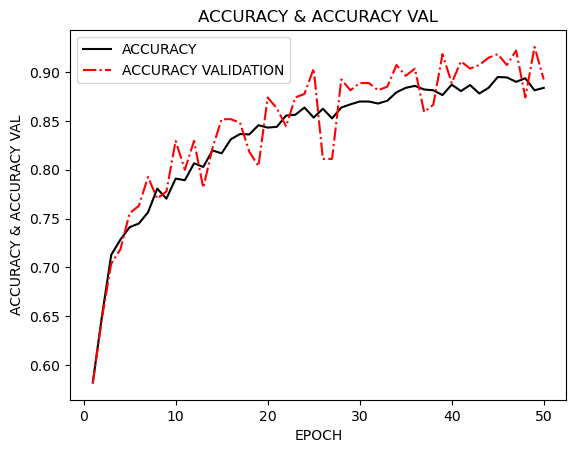

In [92]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

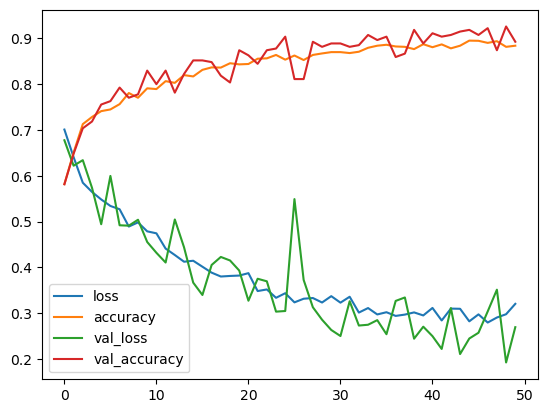

In [93]:
Dict_Summary_Two = pd.DataFrame(CNN_Model_Two.history)
Dict_Summary_Two.plot()

In [94]:
# PREDICTION SCORE ON DIVIDED DATA

In [95]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.2655
ACCURACY:  0.90


In [96]:
# PREDICTION PROCESS

In [97]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

3/3 [==============================] - 1s 266ms/step


In [98]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [102]:
print(Model_Test_Prediction_Two)

[0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


In [ ]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO']


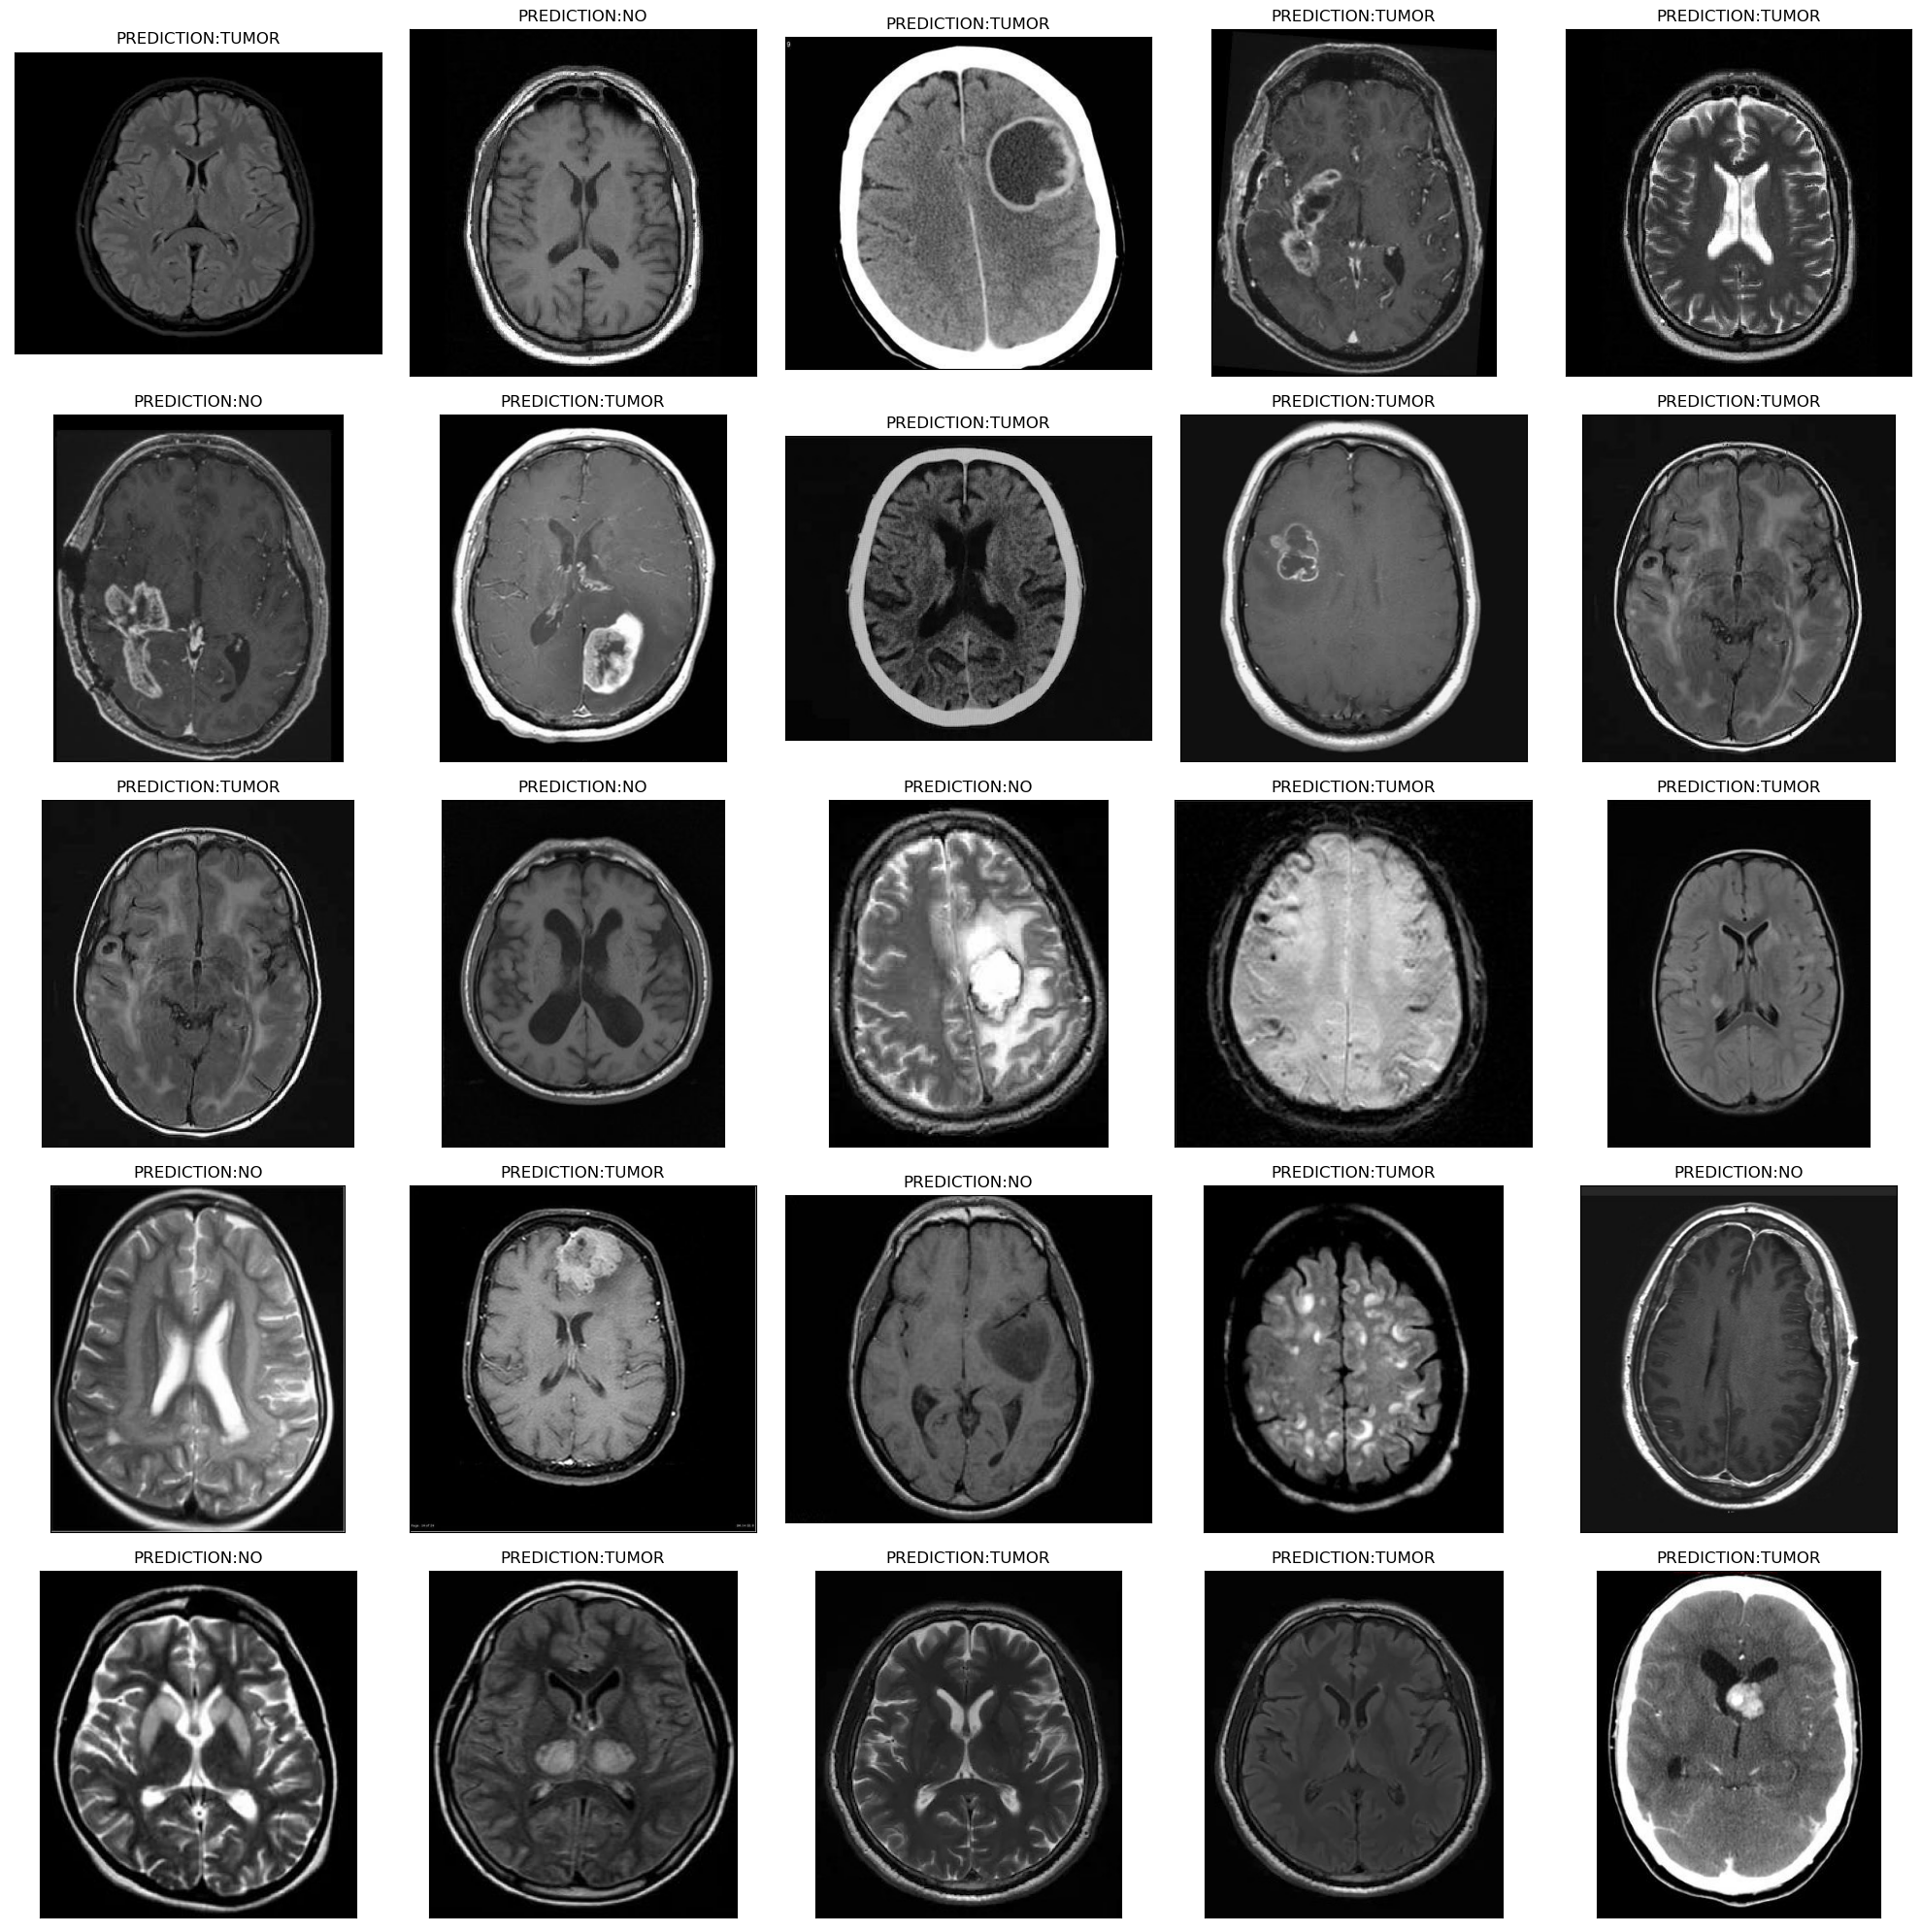

In [103]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()